## Imports

In [1]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)
# Deep Learning
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.callbacks import History
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model

# Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import classification_report



# Deep Learning
import tensorflow as tf
from tensorflow.python.client import device_lib 
from keras.backend.tensorflow_backend import set_session
from tensorflow.python.client import device_lib
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, merge
from keras.layers.normalization import BatchNormalization
from keras.callbacks import History, EarlyStopping, ModelCheckpoint
from keras.models import load_model

# Random Seed
from tensorflow import set_random_seed
from numpy.random import seed
seed(1)
set_random_seed(2)


# Audio
import librosa.display, librosa

Using TensorFlow backend.
/home/rutherford/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rutherford/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rutherford/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rutherford/.local/lib/python3.6/site-packages/t

## Get filenames

In [2]:
# Get files in data path
path='BirdSound/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 450 audio files in BirdSound/


## Prepare labels from filenames

In [3]:
# Get Labels
labels =[]


classes=['Avocet','Bee_eater','Bittern','Bulbul','Bushshrike','Bush_warbler','Cisticola','Coot','Cormorant',
         'Crake','Crane', 'Cuckooshrike', 'Dove','Drongo','Eagle','Egret','Falcon','Gallinule', 'Grassbird', 
         'Grebe','Grouse','Gull','Hawk','Heron','Hornbill' ,'Jay' ,'Kingfisher','Kite','Lapwing', 'Lark', 
         'Leaf_warbler','Martin','Nightjar','Oystercatcher', 'Parrot', 'Pheasant','Pigeon', 'Pipit',  
         'Pitta','Plover','Quail','Rail','Raven','Reed_warbler','Roller','Sandpiper','Sparrow','Starling' , 
         'Stilt', 'Sunbird', 'Swift','Treecreeper','Trogon','Turaco', 'Wagtail','Waxbill','Weaver',
         'White_eye','Woodpecker']



color_dict={
    
           'Avocet':'blue','Bee_eater':'red','Bittern':'green','Bulbul':'black','Bushshrike':'magenta',
         'Bush_warbler':'magenta','Cisticola':'magenta','Coot':'magenta','Cormorant':'magenta',
         'Crake':'magenta','Crane':'magenta', 'Cuckooshrike':'magenta', 'Dove':'magenta','Drongo':'magenta',
         'Eagle':'magenta','Egret':'magenta','Falcon':'magenta','Gallinule':'magenta', 'Grassbird':'magenta', 
         'Grebe':'magenta','Grouse':'magenta','Gull':'magenta','Hawk':'magenta','Heron':'magenta',
         'Hornbill':'magenta' ,'Jay':'magenta' ,'Kingfisher':'magenta','Kite':'magenta','Lapwing':'magenta', 
         'Lark':'magenta','Leaf_warbler':'magenta','Martin':'magenta',   'Nightjar':'magenta',
         'Oystercatcher':'magenta', 'Parrot':'magenta', 'Pheasant':'magenta','Pigeon':'magenta', 
         'Pipit':'magenta','Pitta':'magenta','Plover':'magenta','Quail':'magenta','Rail':'magenta',
         'Raven':'magenta','Reed_warbler':'magenta','Roller':'magenta','Sandpiper':'magenta',
         'Sparrow':'magenta','Starling':'magenta' ,'Stilt':'magenta', 'Sunbird':'magenta', 'Swift':'magenta','Treecreeper':'magenta',
         'Trogon':'magenta','Turaco':'magenta', 'Wagtail':'magenta','Waxbill':'magenta','Weaver':'magenta',
         'White_eye':'magenta','Woodpecker':'magenta'
           
           }

color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [4]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

20 classes: Avocet, Coot, Crake, Crane, Dove, Gallinule, Grebe, Grouse, Lapwing, Nightjar, Oystercatcher, Pheasant, Pigeon, Plover, Quail, Rail, Sandpiper, Stilt, Swift, Turaco


In [5]:
print('Labels:', labels[:3])
print('Encoded Classes: ', classes_num[0:3])

Labels: ['Gallinule', 'Gallinule', 'Gallinule']
Encoded Classes:  [5 5 5]


## Parameters for MFCC

In [6]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [7]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [8]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 450 = BirdSound/Gallinule/XC131319 - Common Gallinule - Gallinula galeata.wav
get 2 of 450 = BirdSound/Gallinule/XC465599 - Common Gallinule - Gallinula galeata cachinnans.wav
get 3 of 450 = BirdSound/Gallinule/XC452961 - Common Gallinule - Gallinula galeata.wav
get 4 of 450 = BirdSound/Gallinule/XC45353 - Spot-flanked Gallinule - Porphyriops melanops crassirostris.wav
get 5 of 450 = BirdSound/Gallinule/XC91834 - Spot-flanked Gallinule - Porphyriops melanops.wav
get 6 of 450 = BirdSound/Gallinule/XC414334 - Common Gallinule - Gallinula galeata.wav
get 7 of 450 = BirdSound/Gallinule/XC368531 - Common Gallinule - Gallinula galeata.wav
get 8 of 450 = BirdSound/Gallinule/XC37123 - Purple Gallinule - Porphyrio martinica.wav
get 9 of 450 = BirdSound/Gallinule/XC7979 - Common Gallinule - Gallinula galeata.wav
get 10 of 450 = BirdSound/Gallinule/XC246282 - Common Gallinule - Gallinula galeata.wav
get 11 of 450 = BirdSound/Gallinule/XC384693 - Common Gallinule - Gallinula galeata.wav
g

get 95 of 450 = BirdSound/Crane/XC216976 - Common Crane - Grus grus.wav
get 96 of 450 = BirdSound/Crake/XC364028 - Rufous-faced Crake - Laterallus xenopterus.wav
get 97 of 450 = BirdSound/Crake/XC15483 - Rufous-faced Crake - Laterallus xenopterus.wav
get 98 of 450 = BirdSound/Crake/XC270595 - Chestnut-headed Crake - Anurolimnas castaneiceps.wav
get 99 of 450 = BirdSound/Crake/XC237988 - Chestnut-headed Crake - Anurolimnas castaneiceps castaneiceps.wav
get 100 of 450 = BirdSound/Crake/XC13469 - Black-banded Crake - Laterallus fasciatus~1.wav
get 101 of 450 = BirdSound/Crake/XC224864 - Rusty-flanked Crake - Laterallus levraudi.wav
get 102 of 450 = BirdSound/Crake/XC69265 - Spotless Crake - Porzana tabuensis.wav
get 103 of 450 = BirdSound/Crake/XC288426 - Grey-breasted Crake - Laterallus exilis.wav
get 104 of 450 = BirdSound/Crake/XC218852 - Russet-crowned Crake - Laterallus viridis.wav
get 105 of 450 = BirdSound/Crake/XC13469 - Black-banded Crake - Laterallus fasciatus.wav
get 106 of 450

get 187 of 450 = BirdSound/Dove/XC17077 - Ruddy Ground Dove - Columbina talpacoti.wav
get 188 of 450 = BirdSound/Dove/XC74980 - Common Ground Dove - Columbina passerina.wav
get 189 of 450 = BirdSound/Dove/XC300695 - Ring-necked Dove - Streptopelia capicola somalica.wav
get 190 of 450 = BirdSound/Dove/XC209306 - Blue Ground Dove - Claravis pretiosa.wav
get 191 of 450 = BirdSound/Coot/XC14381 - American Coot - Fulica americana~1.wav
get 192 of 450 = BirdSound/Coot/XC287245 - Andean Coot - Fulica ardesiaca.wav
get 193 of 450 = BirdSound/Coot/XC139909 - American Coot - Fulica americana.wav
get 194 of 450 = BirdSound/Coot/XC48557 - Red-fronted Coot - Fulica rufifrons.wav
get 195 of 450 = BirdSound/Coot/XC175423 - Eurasian Coot - Fulica atra.wav
get 196 of 450 = BirdSound/Coot/XC57425 - American Coot - Fulica americana.wav
get 197 of 450 = BirdSound/Coot/XC160661 - American Coot - Fulica americana.wav
get 198 of 450 = BirdSound/Coot/XC37846 - American Coot - Fulica americana.wav
get 199 of 4

get 284 of 450 = BirdSound/Plover/XC140325 - Little Ringed Plover - Charadrius dubius papuanus.wav
get 285 of 450 = BirdSound/Plover/XC59911 - Rufous-chested Plover - Charadrius modestus.wav
get 286 of 450 = BirdSound/Plover/XC371003 - Kentish Plover - Charadrius alexandrinus.wav
get 287 of 450 = BirdSound/Plover/XC309206 - Little Ringed Plover - Charadrius dubius curonicus.wav
get 288 of 450 = BirdSound/Plover/XC356536 - Common Ringed Plover - Charadrius hiaticula.wav
get 289 of 450 = BirdSound/Plover/XC345511 - European Golden Plover - Pluvialis apricaria.wav
get 290 of 450 = BirdSound/Plover/XC51732 - Collared Plover - Charadrius collaris.wav
get 291 of 450 = BirdSound/Plover/XC339475 - Common Ringed Plover - Charadrius hiaticula.wav
get 292 of 450 = BirdSound/Plover/XC378002 - Common Ringed Plover - Charadrius hiaticula.wav
get 293 of 450 = BirdSound/Plover/XC441251 - Grey Plover - Pluvialis squatarola.wav
get 294 of 450 = BirdSound/Plover/XC266278 - Little Ringed Plover - Charadri

get 370 of 450 = BirdSound/Oystercatcher/XC144971 - Eurasian Oystercatcher - Haematopus ostralegus.wav
get 371 of 450 = BirdSound/Pigeon/XC715 - Ruddy Pigeon - Patagioenas subvinacea.wav
get 372 of 450 = BirdSound/Pigeon/XC368234 - Dusky Pigeon - Patagioenas goodsoni.wav
get 373 of 450 = BirdSound/Pigeon/XC221376 - Short-billed Pigeon - Patagioenas nigrirostris.wav
get 374 of 450 = BirdSound/Pigeon/XC205976 - Picazuro Pigeon - Patagioenas picazuro.wav
get 375 of 450 = BirdSound/Pigeon/XC94615 - Common Wood Pigeon - Columba palumbus.wav
get 376 of 450 = BirdSound/Pigeon/XC246531 - White-bellied Green Pigeon - Treron sieboldii.wav
get 377 of 450 = BirdSound/Pigeon/XC39584 - Ruddy Pigeon - Patagioenas subvinacea.wav
get 378 of 450 = BirdSound/Pigeon/XC166060 - Orange-breasted Green Pigeon - Treron bicinctus.wav
get 379 of 450 = BirdSound/Pigeon/XC271973 - Plumbeous Pigeon - Patagioenas plumbea wallacei.wav
get 380 of 450 = BirdSound/Pigeon/XC257603 - Plumbeous Pigeon - Patagioenas plumbea

## Standardization: Zero-Mean and Unit-Variance

In [9]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (450, 13)


## Train and Test Sets

In [10]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [11]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (337, 13)
test_set shape: (113, 13)
train_classes shape: (337,)
test_classes shape: (113,)


## Keras

In [12]:
# DNN
# Use Keras Backend Type
train_set_d=train_set.astype(K.floatx())
test_set_d=test_set.astype(K.floatx())

## One Hot Encoding

In [13]:
# One Hot encode
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
integer_encoded_train_classes =  train_classes.reshape(len( train_classes), 1)
onehot_encoded_train_classes = onehot_encoder.fit_transform(integer_encoded_train_classes,1)
integer_encoded_test_classes =  test_classes.reshape(len( test_classes),1)
onehot_encoded_test_classes = onehot_encoder.fit_transform(integer_encoded_test_classes,1)

In [14]:
print('Integer Encoded:', integer_encoded_train_classes[:3] )
print('One-hot Encoded: ', onehot_encoded_train_classes[:3] )

Integer Encoded: [[10]
 [ 9]
 [ 0]]
One-hot Encoded:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
# Check Set Shapes
print("train_set shape:",train_set_d.shape)
print("test_set shape:",test_set_d.shape)
print("train_classes shape:",onehot_encoded_train_classes.shape)
print("test_classes shape:",onehot_encoded_test_classes.shape)

train_set shape: (337, 13)
test_set shape: (113, 13)
train_classes shape: (337, 20)
test_classes shape: (113, 20)


In [16]:
# Reshape Sets for Keras
train_set_d=train_set.reshape(train_set_d.shape[0],1,train_set_d.shape[1])
test_set_d=test_set.reshape(test_set_d.shape[0],1,test_set_d.shape[1])
train_classes_d_hot=onehot_encoded_train_classes.reshape(onehot_encoded_train_classes.shape[0],1,
                                                         onehot_encoded_train_classes.shape[1])
test_classes_d_hot=onehot_encoded_test_classes.reshape(onehot_encoded_test_classes.shape[0],1,
                                                       onehot_encoded_test_classes.shape[1])

In [17]:
# Check Set Shapes
print("train_set shape:",train_set_d.shape)
print("test_set shape:",train_set_d.shape)
print("train_classes shape:",train_classes_d_hot.shape)
print("test_classes shape:",test_classes_d_hot.shape)

train_set shape: (337, 1, 13)
test_set shape: (337, 1, 13)
train_classes shape: (337, 1, 20)
test_classes shape: (113, 1, 20)


## Create a Model

In [22]:
# CNN Model
model = Sequential()

conv_filters =  16  # number of convolution filters

# Layer 1
model.add(Convolution2D(conv_filters, 3,input_shape=(331, 1, 13)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.40)) 

# Layer 2

# Flatten
model.add(Flatten()) 

# Full layer
#model.add(Dense(40, activation='sigmoid')) 

# Output layer
model.add(Dense(20,activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_5/convolution' (op: 'Conv2D') with input shapes: [?,331,1,13], [3,3,13,16].

In [43]:
"""

# Creat Simple Model
model_input = Input(shape=(1,train_set.shape[1]))
fc1 = Dense(70, activation="relu")(model_input)
fc2 = Dense(60, activation="relu")(fc1)
fc3 = Dense(50, activation="relu")(fc2)
fc4 = Dense(40, activation="relu")(fc3)
fc5 = Dense(30, activation="relu")(fc4)
fc6 = Dense(20, activation="relu")(fc5)
n=onehot_encoded_train_classes.shape[1]
out = Dense(n, activation="softmax")(fc4)
model_d = Model(inputs=[model_input], outputs=[out])
model_d.summary()
"""

'\n\n# Creat Simple Model\nmodel_input = Input(shape=(1,train_set.shape[1]))\nfc1 = Dense(70, activation="relu")(model_input)\nfc2 = Dense(60, activation="relu")(fc1)\nfc3 = Dense(50, activation="relu")(fc2)\nfc4 = Dense(40, activation="relu")(fc3)\nfc5 = Dense(30, activation="relu")(fc4)\nfc6 = Dense(20, activation="relu")(fc5)\nn=onehot_encoded_train_classes.shape[1]\nout = Dense(n, activation="softmax")(fc4)\nmodel_d = Model(inputs=[model_input], outputs=[out])\nmodel_d.summary()\n'

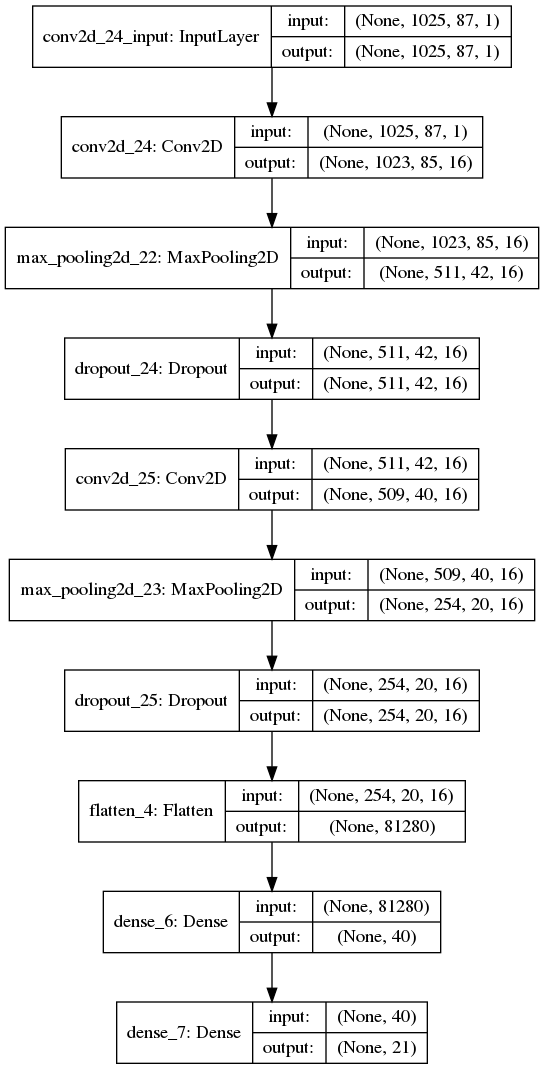

In [46]:
import pydotplus
import keras.utils
keras.utils.vis_utils.pydot = pydotplus
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Compile a Model

In [48]:
# Compile Model
model.compile(loss      = 'categorical_crossentropy',
              optimizer = SGD(lr=0.05),
              metrics   =['accuracy'])

## Train a Model

In [50]:
# Deep Learning Parameters
batch_size = 5 # Number of samples per gradient update.
epochs = 20    # An epoch is an iteration over the entire x and y data provided.

# Train Model
hist = model.fit(train_set_d, train_classes_d_hot, verbose=1, 
                    batch_size=batch_size, epochs=epochs, validation_data=(test_set_d,test_classes_d_hot))

ValueError: Error when checking input: expected conv2d_24_input to have 4 dimensions, but got array with shape (337, 1, 13)

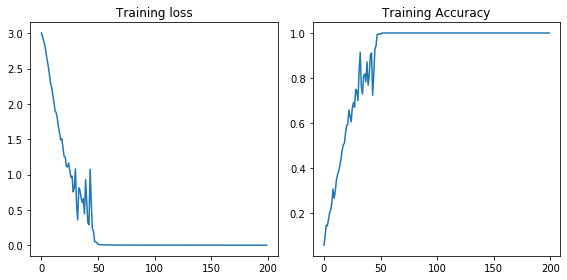

In [48]:
# Plot Training Loss and Training Accuracy
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.title("Training loss")
plt.plot(range(epochs),hist.history["loss"])

plt.subplot(1, 2, 2)
plt.title("Training Accuracy")
plt.plot(range(epochs),hist.history["accuracy"])

plt.tight_layout()

## Make Predictions

In [49]:
# Predict
predictions = model_d.predict(test_set_d)
predictions_round=predictions.round().astype('int')
predictions_int=np.argmax(predictions_round,axis=2)
predictions_labels=labelencoder.inverse_transform(np.ravel(predictions_int))

## Evaluation

In [50]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predictions_int,average=None))

# Precision - The precision is intuitively the ability of the classifier not to label as positive a sample that is negatives
print("Precision: ", precision_score(test_classes, predictions_int,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision and recall,
print("F1-Score: ", f1_score(test_classes, predictions_int, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: ", accuracy_score(test_classes, predictions_int,normalize=False))
print("Number of samples:",test_classes.shape[0])

Recall:  [0.5        0.16666667 0.14285714 0.5        0.         0.
 0.         0.16666667 0.16666667 0.33333333 0.         0.
 0.2        0.         0.         0.2        0.2        0.
 0.4        0.4       ]
Precision:  [0.16666667 0.11111111 0.33333333 0.6        0.         0.
 0.         0.2        0.1        0.2        0.         0.
 0.25       0.         0.         0.2        0.2        0.
 0.5        0.66666667]
F1-Score:  [0.25       0.13333333 0.2        0.54545455 0.         0.
 0.         0.18181818 0.125      0.25       0.         0.
 0.22222222 0.         0.         0.2        0.2        0.
 0.44444444 0.5       ]
Accuracy:  19
Number of samples: 113


In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predictions_int)
np.set_printoptions(precision=2)

In [52]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

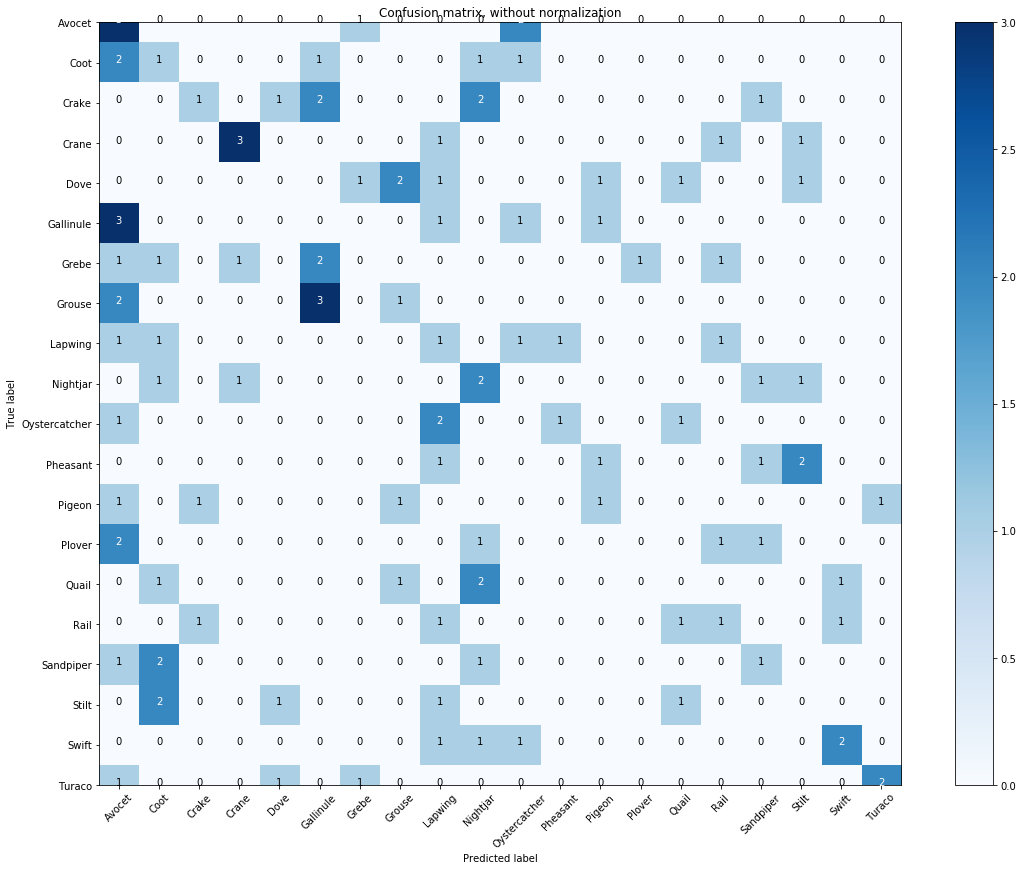

In [53]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(16,12))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [54]:
# Find wrong predicted samples indexes
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predictions_int)) if e1 != e2]

In [55]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predictions_labels[wrong_predictions].T)
print(np.array(files)[test_index[wrong_predictions]])

['Grebe' 'Grouse' 'Dove' 'Sandpiper' 'Avocet' 'Coot' 'Nightjar' 'Lapwing'
 'Lapwing' 'Dove' 'Rail' 'Crake' 'Nightjar' 'Quail' 'Lapwing' 'Crane'
 'Grebe' 'Grebe' 'Grebe' 'Quail' 'Stilt' 'Pheasant' 'Quail' 'Turaco'
 'Crane' 'Pheasant' 'Grebe' 'Dove' 'Plover' 'Oystercatcher' 'Pheasant'
 'Pigeon' 'Swift' 'Avocet' 'Stilt' 'Stilt' 'Lapwing' 'Gallinule' 'Coot'
 'Grebe' 'Grouse' 'Crake' 'Pheasant' 'Gallinule' 'Pigeon' 'Sandpiper'
 'Gallinule' 'Gallinule' 'Sandpiper' 'Oystercatcher' 'Grebe' 'Crake'
 'Pheasant' 'Grouse' 'Oystercatcher' 'Grouse' 'Dove' 'Dove' 'Turaco'
 'Plover' 'Plover' 'Gallinule' 'Rail' 'Coot' 'Crake' 'Grouse' 'Turaco'
 'Pigeon' 'Crake' 'Oystercatcher' 'Nightjar' 'Avocet' 'Pigeon' 'Plover'
 'Quail' 'Swift' 'Plover' 'Lapwing' 'Coot' 'Stilt' 'Dove' 'Rail' 'Stilt'
 'Quail' 'Gallinule' 'Crane' 'Swift' 'Rail' 'Dove' 'Oystercatcher'
 'Sandpiper' 'Crake' 'Coot' 'Nightjar']
['Gallinule' 'Avocet' 'Quail' 'Avocet' 'Oystercatcher' 'Oystercatcher'
 'Sandpiper' 'Pheasant' 'Rail' 'Pigeon' 'S

In [56]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

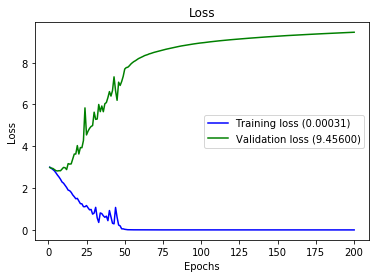

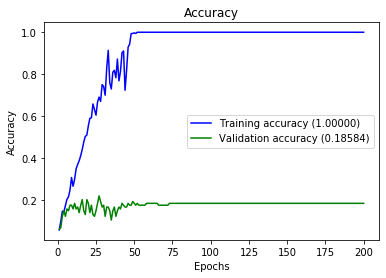

In [57]:
plot_history(hist)

## Convolutional Neural Networks

## Create Model

In [62]:
# CNN Model
model = Sequential()

conv_filters =  16  # number of convolution filters

# Layer 1
model.add(Convolution2D(conv_filters, 3,input_shape=(1025, 87, 1)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.40)) 

# Layer 2
model.add(Convolution2D(conv_filters, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

# Layer 3
model.add(Convolution2D(conv_filters, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

# Flatten
model.add(Flatten()) 

# Full layer
model.add(Dense(30, activation='sigmoid')) 

# Output layer
model.add(Dense(20,activation='softmax'))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1023, 85, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 511, 42, 16)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 511, 42, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 509, 40, 16)       2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 254, 20, 16)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 254, 20, 16)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 252, 18, 16)      

In [64]:
# Loss Function 
loss = 'categorical_crossentropy' 

# Optimizer = Gradient Descent
optimizer = 'sgd' 

# Compile
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [66]:
def featureGenerator(files, labels):
    while True:
        for i,f in enumerate(files):
            try:
                feature_vectors = []
                label = []
                y, sr = librosa.load(f, sr=fs)
                if len(y) < 2:
                    print("Error loading %s" % f)
                    continue
                y, index = librosa.effects.trim(y,top_db=60) #Trim
                y = normalize(y)
                duration_in_samples=librosa.time_to_samples(1, sr=fs)
                y_pad = librosa.util.fix_length(y, duration_in_samples) #Pad/Trim to same duration
                y_stft=librosa.core.stft(y_pad, n_fft=n_fft, hop_length=hop_length)
                y_spec=librosa.amplitude_to_db(abs(y_stft), np.min)
                scaler = StandardScaler()
                dtype = K.floatx()
                data = scaler.fit_transform(y_spec).astype(dtype)
                data = np.expand_dims(data, axis=0)
                data = np.expand_dims(data, axis=3)
                feature_vectors.append(data)
                label.append([labels[i]])
                yield feature_vectors, label
            except Exception as e:
                print("Error loading %s. Error: %s" % (f,e))
                raise
                break

In [69]:
%%time
hist = History();
es = EarlyStopping(monitor='val_acc', min_delta=0.01, restore_best_weights=True, patience= 10, verbose=1 )
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',save_best_only=True, verbose=1)

"""
try:
    import google.colab
    tbc=TensorBoardColab()
    callbacksKeras=[hist,es,mc,TensorBoardColabCallback(tbc)]

except Exception as e:
    callbacksKeras=[hist,es,mc]
    print("Not inside Google Colab: %s. Using standard configurations." % (e))

"""


model.fit_generator(featureGenerator(train_set_files, train_classes), 
                    validation_data=(featureGenerator(test_set_files, test_classes)), 
                    validation_steps=150, 
                    steps_per_epoch=450,epochs=30,callbacks=callbacksKeras, verbose=1)

NameError: name 'test_set_files' is not defined

In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss')
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss')
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_history(hist)

## Evaluate Model

In [ ]:
saved_model = load_model('best_model.h5')
test_pred = saved_model.predict_generator(featureGenerator(test_set_files, test_classes), steps=150,verbose=1)

In [ ]:
predictions_round=np.around(test_pred).astype('int');
predictions_int=np.argmax(predictions_round,axis=1);
predictions_labels=labelencoder.inverse_transform(np.ravel(predictions_int));

In [ ]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(classes_num[test_index], predictions_int,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(classes_num[test_index], predictions_int,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(classes_num[test_index], predictions_int, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(classes_num[test_index], predictions_int,normalize=True), accuracy_score(classes_num[test_index], predictions_int,normalize=False) )
print("Number of samples:",classes_num[test_index].shape[0])

print(classification_report(classes_num[test_index], predictions_int))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(classes_num[test_index], predictions_int)
np.set_printoptions(precision=2)

In [ ]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(16,12))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [ ]:
# Find wrong predicted samples indexes
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(classes_num[test_index], predictions_int)) if e1 != e2]


In [ ]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predictions_labels[wrong_predictions].T)
print(np.array(files)[test_index[wrong_predictions]])